In [1]:
from pathlib import Path
import pandas as pd

import seaborn as sns
import matplotlib
print(matplotlib.__version__)
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

3.4.2


In [11]:
def load_data(data_dir=Path("/usr/workspace/atom/gbsa_modeling/dude_smiles/"),
             split_type="random"):
    
    df_list = []
    for path in data_dir.glob("*_gbsa_smiles.csv"):
#         print(path)
        
        path_df = pd.read_csv(path)
        
        target = path.stem.split('_')[0]
        if split_type == "random":
            split_df = pd.read_csv(path.with_name(f"{target}_gbsa_smiles_with_base_rdkit_smiles_train_valid_test_random_random.csv"))
        elif split_type == "scaffold":
            split_df = pd.read_csv(path.with_name(f"{target}_gbsa_smiles_with_base_rdkit_smiles_train_valid_test_scaffold_scaffold.csv"))

        
        path_df['target'] = [target] * len(path_df)
        
        merged_df = pd.merge(path_df, split_df, left_on="id", right_on="cmpd_id")
        
        
        
        df_list.append(merged_df)

    df = pd.concat(df_list)

    df = df.reindex()
    df['active'] = df['decoy'].apply(lambda x: 1 - int(x))
    
    return df

In [12]:
random_df = load_data(split_type="random")
random_df

,id,best_gbsa_score,smiles,decoy,target,cmpd_id,subset,active
0,CHEMBL103971,-53.8005,CCc1c(c(nc(n1)N)N)c2ccc(c(c2)N(=O)=O)N(C)Cc3cc...,False,dyr,CHEMBL103971,valid,1
1,CHEMBL121348,-52.8784,CN(CC1CCc2c(c(nc(n2)N)N)C1)c3cccc4c3cccc4,False,dyr,CHEMBL121348,train,1
2,CHEMBL87013,-52.5236,CCc1c(c(nc(n1)N)N)c2ccc(c(c2)N=NN(CCOC(=O)c3cc...,False,dyr,CHEMBL87013,train,1
3,CHEMBL105526,-50.7542,CCc1c(c(nc(n1)N)N)c2ccc(c(c2)N(=O)=O)NCc3ccc(c...,False,dyr,CHEMBL105526,train,1
4,CHEMBL55764,-49.8980,CCc1c(c(nc(n1)N)N)c2ccc(c(c2)N=NN(CCOC(=O)C)Cc...,False,dyr,CHEMBL55764,train,1
...,...,...,...,...,...,...,...,...
31670,ZINC63375777,-0.1563,CCCNC(=O)c1ccccc1N1C(=O)C2CC3=c4ccccc4=[NH+]C3...,True,egfr,ZINC63375777,test,0
31671,ZINC00950063,-0.1216,Cc1sc(NC(=O)c2ccco2)c(C(c2cccnc2)[NH+]2CCCCC2)c1C,True,egfr,ZINC00950063,train,0
31672,ZINC13499399,-0.0379,CCCC(c1nnnn1Cc1ccccc1)[NH+](Cc1cc2cc3c(cc2[nH]...,True,egfr,ZINC13499399,train,0
31673,ZINC06443596,-0.0200,Cc1cccc2cc(C(c3nnnn3C(C)(C)C)[NH+]3CCN(c4nc5cc...,True,egfr,ZINC06443596,train,0


In [13]:
scaffold_df = load_data(split_type="scaffold")
scaffold_df

,id,best_gbsa_score,smiles,decoy,target,cmpd_id,subset,active
0,CHEMBL103971,-53.8005,CCc1c(c(nc(n1)N)N)c2ccc(c(c2)N(=O)=O)N(C)Cc3cc...,False,dyr,CHEMBL103971,test,1
1,CHEMBL121348,-52.8784,CN(CC1CCc2c(c(nc(n2)N)N)C1)c3cccc4c3cccc4,False,dyr,CHEMBL121348,test,1
2,CHEMBL87013,-52.5236,CCc1c(c(nc(n1)N)N)c2ccc(c(c2)N=NN(CCOC(=O)c3cc...,False,dyr,CHEMBL87013,test,1
3,CHEMBL105526,-50.7542,CCc1c(c(nc(n1)N)N)c2ccc(c(c2)N(=O)=O)NCc3ccc(c...,False,dyr,CHEMBL105526,test,1
4,CHEMBL55764,-49.8980,CCc1c(c(nc(n1)N)N)c2ccc(c(c2)N=NN(CCOC(=O)C)Cc...,False,dyr,CHEMBL55764,test,1
...,...,...,...,...,...,...,...,...
31670,ZINC63375777,-0.1563,CCCNC(=O)c1ccccc1N1C(=O)C2CC3=c4ccccc4=[NH+]C3...,True,egfr,ZINC63375777,train,0
31671,ZINC00950063,-0.1216,Cc1sc(NC(=O)c2ccco2)c(C(c2cccnc2)[NH+]2CCCCC2)c1C,True,egfr,ZINC00950063,train,0
31672,ZINC13499399,-0.0379,CCCC(c1nnnn1Cc1ccccc1)[NH+](Cc1cc2cc3c(cc2[nH]...,True,egfr,ZINC13499399,train,0
31673,ZINC06443596,-0.0200,Cc1cccc2cc(C(c3nnnn3C(C)(C)C)[NH+]3CCN(c4nc5cc...,True,egfr,ZINC06443596,train,0


In [14]:
def plot_split_label_counts_by_subset(df):


    for group_name, group_df in df.groupby('subset'):

        f, ax = plt.subplots(1,1, figsize=(24,8))
        sns.countplot(data=group_df, x="target", hue="active")
        ax.tick_params(labelrotation=45)
    #     ax.bar_label(ax.containers[0])
        for container in ax.containers:
            ax.bar_label(container)

        f.suptitle(group_name)

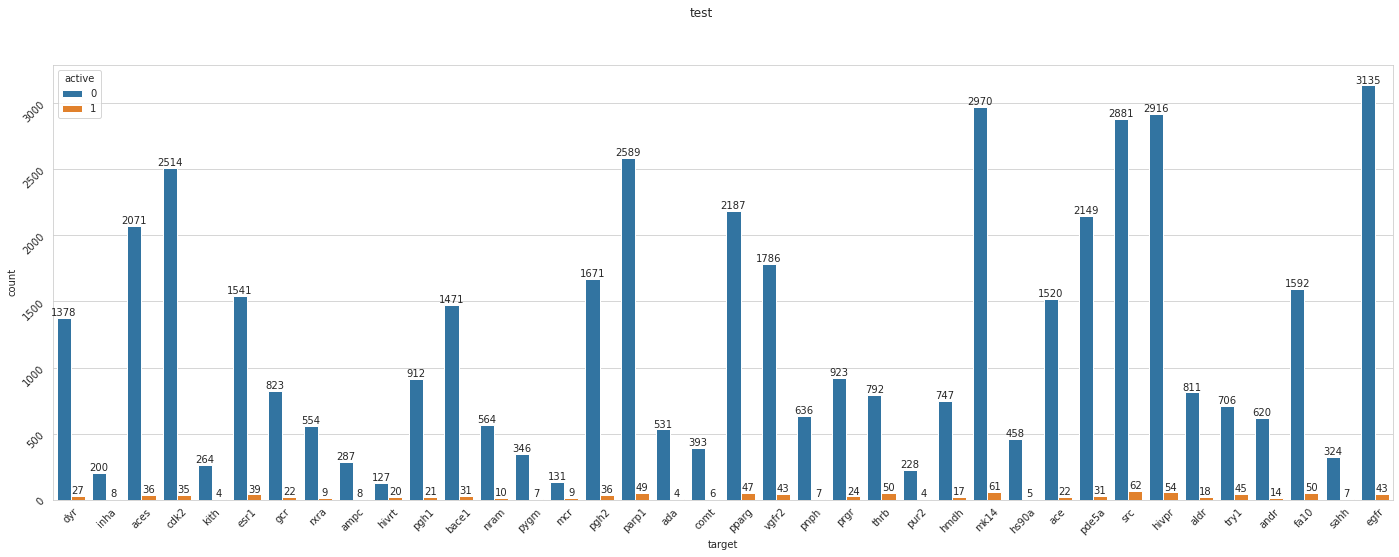

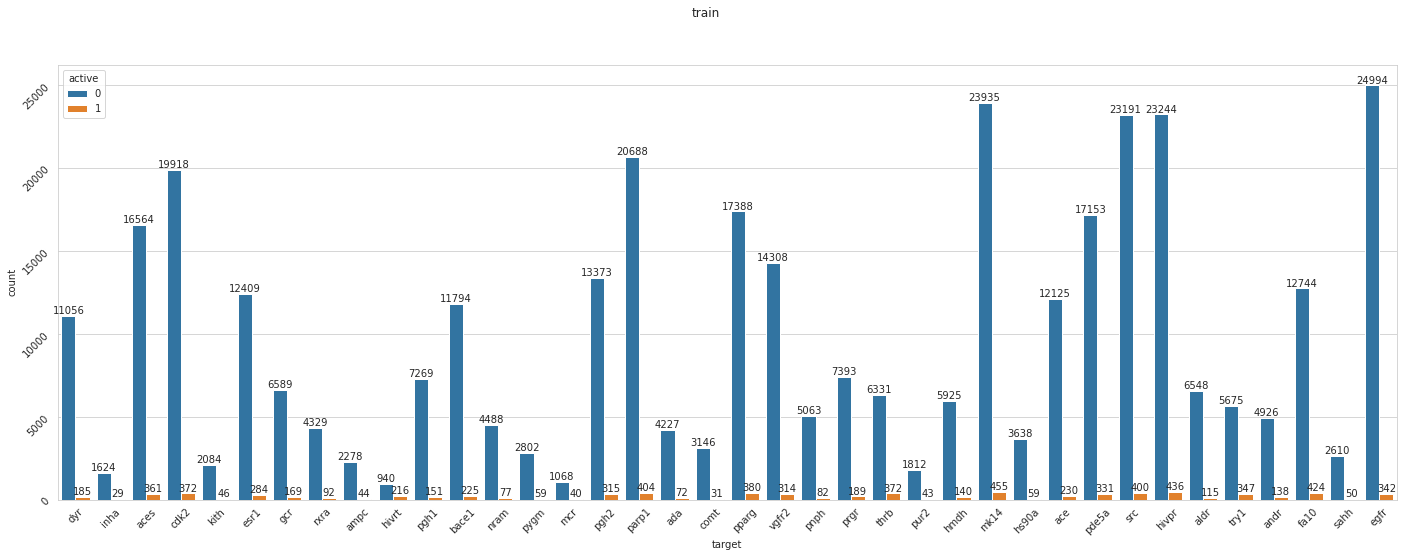

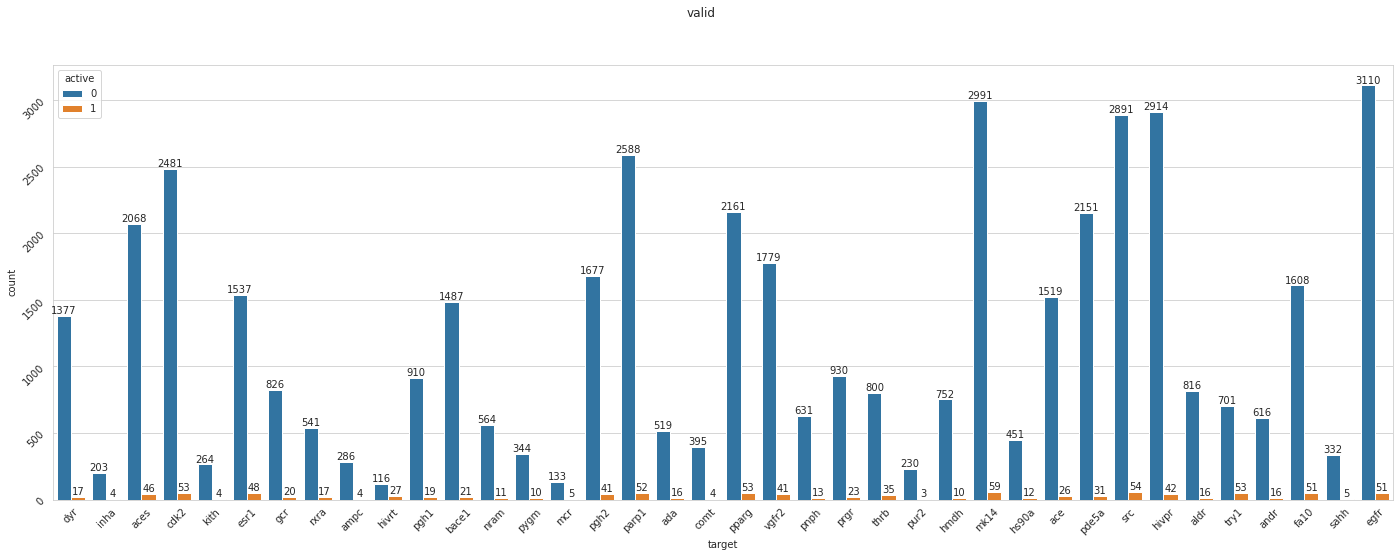

In [15]:
plot_split_label_counts_by_subset(random_df)

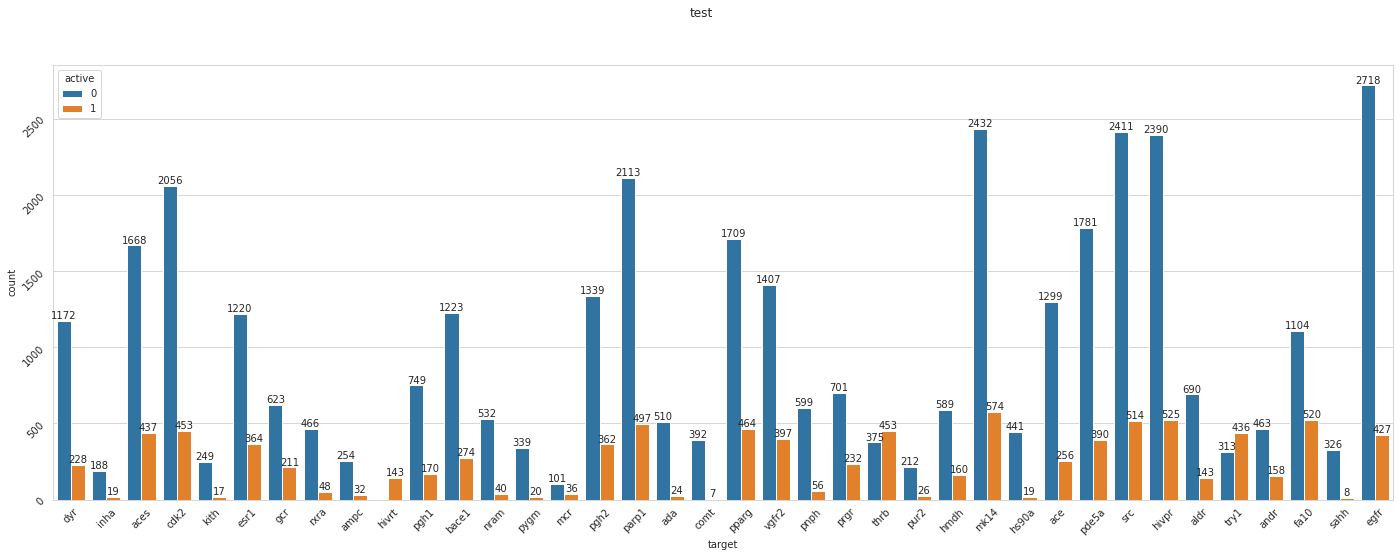

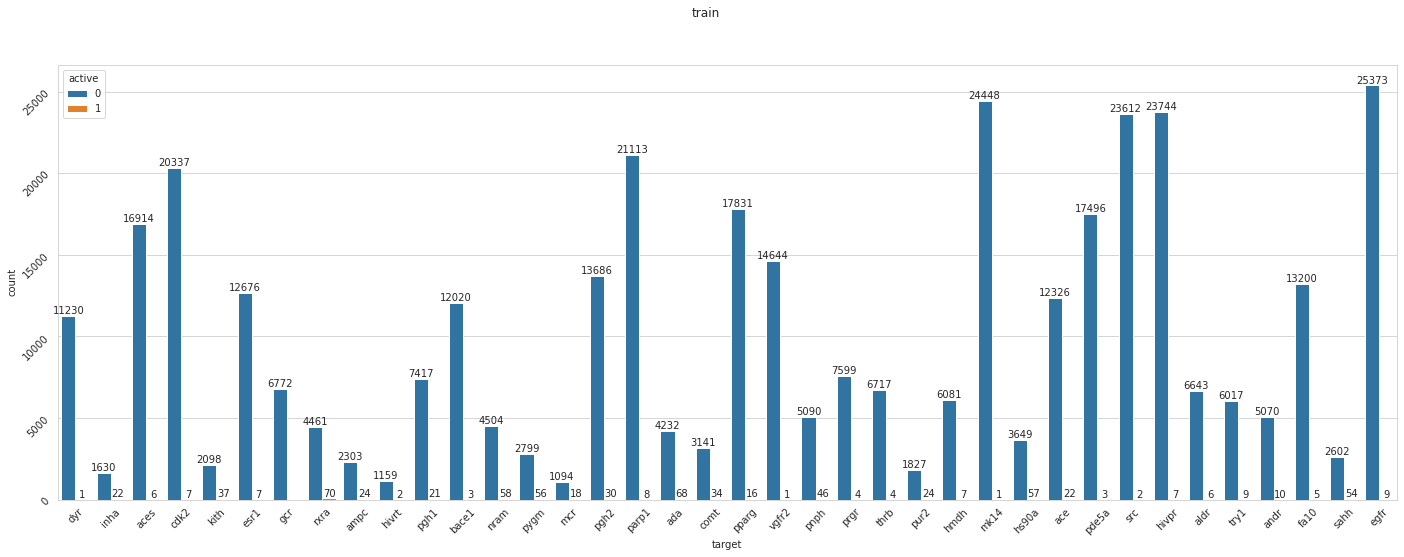

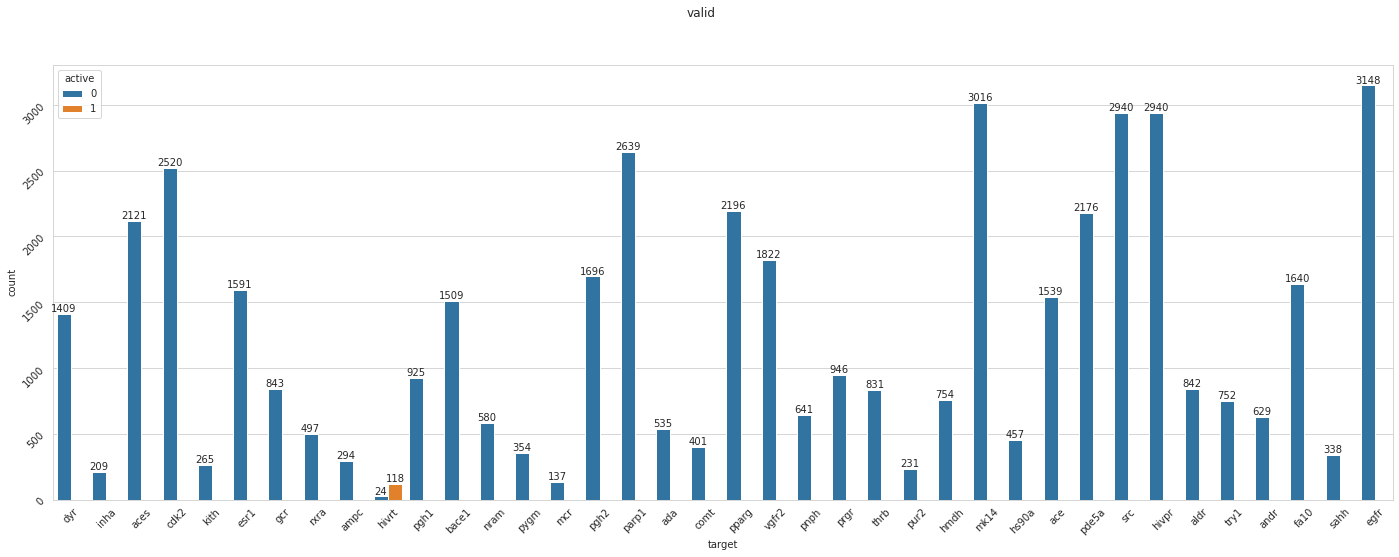

In [16]:
plot_split_label_counts_by_subset(scaffold_df)

## Takeaway (07/18/22)
is that the scaffold splitter picks up nearly all of the actives for a particular target and assigns them to one subset (train/val/test) making it a poor choice to evaluate models with for the DUD-E dataset as it stands. I also feel like I'm not the first one to run into this issue so there must be another solution to account for structure in the training/val/test splits. For now will use random stratified split (not the one I'm loading here) as the DUD-E basis of evalution and revist structure-based splitting later.